# Assignment 1 - Deep Learning With Keras - 40%

**IMPORTANT NOTE**: By default, this notebook is set to a CPU runtime, to help prevent you getting locked out of Google Colab. When training your models, you will need to switch to a GPU runtime, otherwise the training will take a very long time.

**Deadline**: 21 Mar 2023, 23:59

**Submission Requirements**: You should submit your Colab Notebook, with all the outputs printed, and a sharing link to the notebook in your Drive. As detailed above, you should submit a 2-page report in PDF or DOCX format.

**Learning Outcomes**

This Assignment assesses the following module Learning Outcomes (from Definitive Module Document):

* have knowledge of and understand how GPUs can accelerate data processing
* be able to write data processing pipelines that exploit Tensorflow
* have knowledge of and understand how to develop GPU-accelerated data processing pipelines using the Tensorflow and RAPIDS frameworks

**Assignment Details**

This assignment will test your ability to implement and test a deep neural network using keras. By varying the properties of the model and the data input pipeline, you will explore and analyse the training time and performance of the model. There will be four tasks for you to complete, each of which requires you to complete a range of tests on the model, visualise the results, and comment on them in a short report. Your report should focus on explaining and critically analysing the results—you will be assessed not just on your ability to show what is happening, but explain WHY it is happening.

All coding work for this assignment should be done inside a copy of the Colab Notebook provided on this page. Any submissions not in this format will not be marked.

**Task 1**: A model description is provided in the Colab Notebook for this assignment. Implement this model, ensuring that you have the correct output shapes for each of the layers and the correct number of model parameters. Train the model on the dataset provided in the notebook—initial training settings are provided also. Create plots of the losses and metrics of the training and validation data, and a plot that shows example images from each class that have been correctly AND incorrectly labelled by the model. Analyse these results in your report.

**Task 2**: Select two additional optimizers. Including the one provided in the initial training settings, test your model with each of these optimizers using a range of different learning rates. You may need to train the model for more epochs to ensure that it converges on a solution. Create plots that show the losses and metrics for each of these runs, and comment on the results in your report. Select the optimizer and learning rate that provided the best results, and move onto the next task.

**Task 3**: The batch size can heavily influence the amount of time it takes to train a model. Vary the batch size used to train the model and, utilising the Early Stopping callback provided, create plots that show how the time per epoch and total training time changes. Comment on these results in your report.

**Task 4**: The model as provided does not contain any regularisation techniques. Edit the model architecture to include at least two examples of regularisation. Retrain the model using the new architecture, and repeat the analysis performed in task 1. In your report, compare and contrast the results from this task, with those from the initial model configuration.



In [14]:
# Module Imports - Add any additional modules here
import tensorflow as tf
import numpy as np
import time 
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers

In [15]:
# Loading the Dataset. Here we use the CIFAR-10 dataset of labelled images

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Rescale the pixel values
x_train = x_train/255.
x_test = x_test/255.

# List of label names
class_names = ['plane', 'car', 'bird', 'cat', 'deer',
               'canine', 'frog', 'horse', 'boat', 'truck']

# Task 1 - Initial Model

Implement the model architecture detailed below, using the Keras Functional API, ensuring that you have the correct output shapes for each of the layers.

Train the model on the CIFAR-10 dataset.

Create plots of the losses and metrics of the training and validation data, and plots that show example test images from each class that have been correctly AND incorrectly labelled by the model.

Analyse these results in your report.

**Model Architecture**

A summary of the model architecture is given here, which shows the layers of the model, the output shapes of those layers, and the activation functions used. You will need to work out the other settings used to produce the model, such as the kernal sizes, padding schemes, and stride lengths. You should ensure that the output shapes and total number of parameters in your model match the summary here.

```
Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Activation   
=================================================================
 Input (InputLayer)          [(None, 32, 32, 3)]       None         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 16)        ReLU       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 16)        ReLU      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        None         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 32)        ReLU      
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 32)        ReLU      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 32)          None         
                                                                 
 conv_5 (Conv2D)             (None, 8, 8, 64)          ReLU     
                                                                 
 conv_6 (Conv2D)             (None, 8, 8, 64)          ReLU     
                                                                 
 pool_3 (MaxPooling2D)       (None, 4, 4, 64)          None         
                                                                 
 flat (Flatten)              (None, 1024)              None         
                                                                 
 fc_1 (Dense)                (None, 512)               ReLU    
                                                                 
 Output (Dense)              (None, 10)                SoftMax      
                                                                 
=================================================================
Total params: 602,010
Trainable params: 602,010
Non-trainable params: 0
_________________________________________________________________
```



In [3]:
### Create the model using the provided architecture

Inp = layers.Input((32,32,3), dtype='float32', name='Model_Input')
Conv_1 = layers.Conv2D(16, (3,3), activation='relu', padding='same', name='conv_1')(Inp)
Conv_2 = layers.Conv2D(16, (3,3), activation='relu', padding='same', name='conv_2')(Conv_1)
Pool_1 = layers.MaxPool2D(pool_size=(2,2),name='pool_1')(Conv_2)
Conv_3 = layers.Conv2D(32, (3,3), activation='relu', padding='same', name='conv_3')(Pool_1)
Conv_4 = layers.Conv2D(32, (3,3), activation='relu', padding='same', name='conv_4')(Conv_3)
Pool_2 = layers.MaxPool2D(pool_size=(2,2), name='pool_2')(Conv_4)
Conv_5 = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='conv_5')(Pool_2)
Conv_6 = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='conv_6')(Conv_5)
Pool_3 = layers.MaxPool2D(pool_size=(2,2),name='pool_3')(Conv_6)
Flat = layers.Flatten(name = 'flatten')(Pool_3)
Dense1 = layers.Dense(512, activation='relu', name='fc_1')(Flat)
Output = layers.Dense(10, name='Output', activation='softmax')(Dense1)

cifar_model = models.Model(inputs=Inp, outputs=Output)
cifar_model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Model_Input (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 32)        4640      
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 32)          0     

In [4]:
### Compile the model using the SGC optimizer, with default learning rate,
### Sparse Categorical Crossentropy, and accuracy metric.

cifar_model.compile(optimizer= optimizers.SGD(), loss= losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [5]:
### Train the model for 50 epochs, with a batch size of 128. Include the test
### data for model validation. Store the losses and metrics in a history object.
history = cifar_model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), batch_size = 128)
print(history.history.keys)

Epoch 1/50
391/391 [==============================] - 13s 9ms/step - loss: 2.2670 - accuracy: 0.1411 - val_loss: 2.1533 - val_accuracy: 0.2431
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 2.0276 - accuracy: 0.2659 - val_loss: 1.9267 - val_accuracy: 0.2991
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 1.9069 - accuracy: 0.3133 - val_loss: 1.9677 - val_accuracy: 0.2881
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7631 - accuracy: 0.3664 - val_loss: 1.6149 - val_accuracy: 0.4331
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6290 - accuracy: 0.4167 - val_loss: 1.5451 - val_accuracy: 0.4451
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 1.5369 - accuracy: 0.4471 - val_loss: 1.4843 - val_accuracy: 0.4644
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.4730 - accuracy: 0.4703 - val_loss: 1.4609 - val_accuracy: 0.4704
Epoch

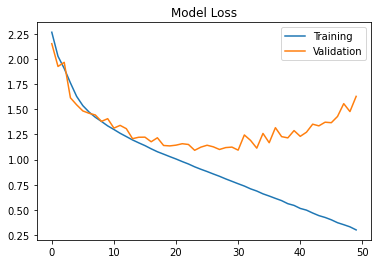

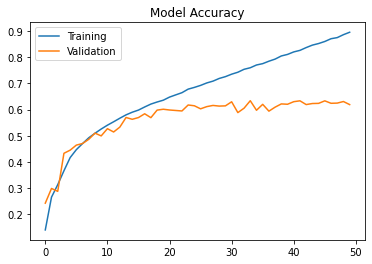

313/313 [==============================] - 1s 2ms/step


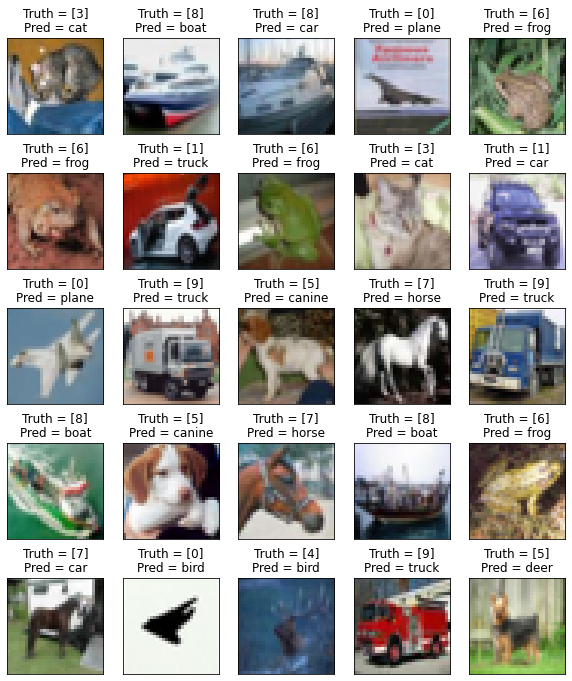

In [6]:
### Create plots of the losses and metrics of the training and validation data,
### and plots that shows example test images from each class that have been
### correctly AND incorrectly labelled by the model.
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

y_pred = cifar_model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

f, ax = plt.subplots(5,5, figsize=(10, 12))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_test[i])
    ax[i].set_title(f'Truth = {y_test[i]}\nPred = {class_names[y_pred_label[i]]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

# Task 2 - Testing Optimizers

Select two additional optimizers. Including the SGD algorithm already used, test all three of these optimizers with a range of different learning rates.

You may need to train the model for more or less epochs to ensure that it converges on a solution.

Create plots that show the losses and metrics for each of these runs, and comment on the results in your report.

Select the optimizer and learning rate that provided the best results, and move onto the next task.

**Note**: You should reset the weights of the model between each test. A function is provided to perform this task. Store the losses and metrics of each run under a different variable name, so that they can all be plotted together.

In [7]:
# Utility function that resets the weights of your model. Call this before
# recompiling your model with updated settings, to ensure you train the model
# from scratch.

def reinitialize(model):
    # Loop over the layers of the model
    for l in model.layers:
        # Check if the layer has initializers
        if hasattr(l,"kernel_initializer"):
            # Reset the kernel weights
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            # Reset the bias
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))

# Function modified from here: https://stackoverflow.com/questions/63435679/reset-all-weights-of-keras-model
reinitialize(cifar_model)

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [8]:
### Test the SGD Optimizer, plus two others of your choice, with a range of
### learning rates.
cifar_model.compile(optimizer = optimizers.SGD(learning_rate = (0.1)),
                    loss= losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = cifar_model.fit(x_train, y_train, epochs= 50, validation_data= (x_test, y_test), batch_size = 128)
print(history.history.keys)
reinitialize(cifar_model)

cifar_model.compile(optimizer = optimizers.Adam(learning_rate = (0.01)),  
                    loss= losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history1 = cifar_model.fit(x_train, y_train, epochs= 50, validation_data= (x_test, y_test), batch_size = 128)
print(history1.history.keys)
reinitialize(cifar_model)

cifar_model.compile(optimizer = optimizers.Adagrad(learning_rate = (0.001)), 
                    loss= losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history2 = cifar_model.fit(x_train, y_train, epochs= 50, validation_data= (x_test, y_test), batch_size = 128)
print(history2.history.keys)
reinitialize(cifar_model)



Epoch 1/50
391/391 [==============================] - 6s 12ms/step - loss: 2.2555 - accuracy: 0.1506 - val_loss: 2.3044 - val_accuracy: 0.0997
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 2.0681 - accuracy: 0.2409 - val_loss: 1.7714 - val_accuracy: 0.3605
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6733 - accuracy: 0.4051 - val_loss: 1.5348 - val_accuracy: 0.4569
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.4632 - accuracy: 0.4821 - val_loss: 1.4147 - val_accuracy: 0.4944
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.3111 - accuracy: 0.5362 - val_loss: 1.2963 - val_accuracy: 0.5417
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.1873 - accuracy: 0.5792 - val_loss: 1.2719 - val_accuracy: 0.5505
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.0745 - accuracy: 0.6212 - val_loss: 1.4311 - val_accuracy: 0.5069
Epoch

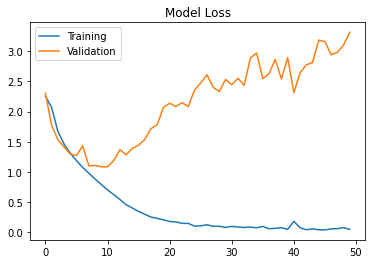

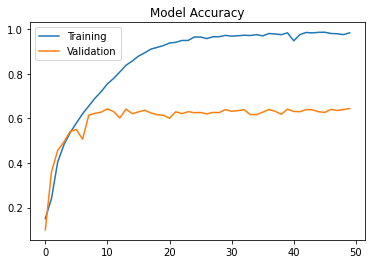

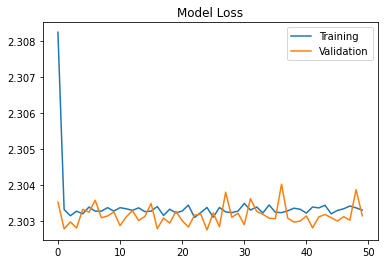

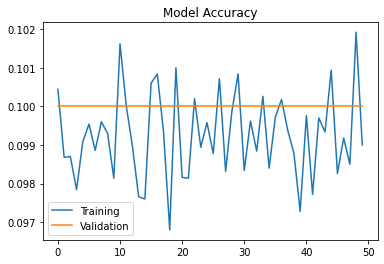

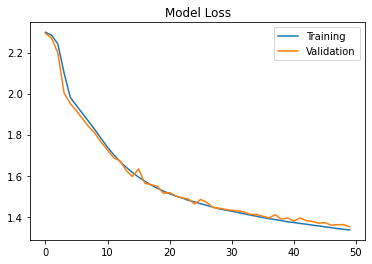

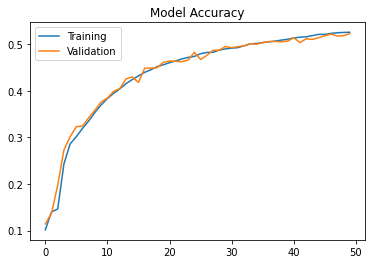

In [9]:
### Create plots that show the losses and metrics for each of these runs, and
### comment on the results in your report.
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()


plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()


# Task 3 - Testing Batch Sizes

The batch size can heavily influence the amount of time it takes to train a model. Vary the batch size used to train the model and, utilising the Early Stopping callback provided, create plots that show how the time per epoch and total training time changes.

Comment on these results in your report—consider both how the batch size influences the number of epochs it takes to reach a solution, and how long each epoch takes to run. Why is this the case?

In [16]:
### Train the model with a range of different batch sizes, resetting the weights
### each time. Use an Early Stopping callback to prevent the model training for
### too long.

Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

batch_sizes = [32, 64, 128, 256]
time_per_epoch = []
total_training_time = []
for batch_size in batch_sizes:
    print(f"Training model with batch size {batch_size}")
    reinitialize(cifar_model)
    start_time = time.time()
    cifar_model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
                    loss=losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])    
    # Fit the model with early stopping
    history = cifar_model.fit(x_train, y_train, batch_size=batch_size, epochs=50, validation_split=0.2, callbacks=[Early_Stop])
    end_time = time.time()
    time_per_epoch.append((end_time - start_time) / len(history.history["loss"]))
    total_training_time.append(end_time - start_time)
    
    print("Time per epoch:", time_per_epoch[-1])
    print("Total training time:", total_training_time[-1])
    # Evaluate the model on the test set
    test_loss, test_acc = cifar_model.evaluate(x_test, y_test)
    print(f"Test accuracy with batch size {batch_size}: {test_acc}")

Training model with batch size 32


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.0902 - accuracy: 0.2254 - val_loss: 1.9105 - val_accuracy: 0.3047
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7101 - accuracy: 0.3833 - val_loss: 1.5412 - val_accuracy: 0.4528
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4921 - accuracy: 0.4604 - val_loss: 1.4288 - val_accuracy: 0.4871
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3801 - accuracy: 0.5085 - val_loss: 1.3225 - val_accuracy: 0.5291
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2852 - accuracy: 0.5429 - val_loss: 1.2855 - val_accuracy: 0.5477
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2046 - accuracy: 0.5726 - val_loss: 1.1734 - val_accuracy: 0.5827
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1291 - accuracy: 0.6017 - val_loss: 1.2040 - val_accuracy:

# Task 4 - Adding Regularisation

The model as provided does not contain any regularisation techniques. Edit the model architecture to include at least two examples of regularisation. Retrain the model using the new architecture, and repeat the analysis performed in task 1.

In your report, compare and contrast the results from this task, with those from the initial model configuration. Explain HOW and WHY the results are different, with consideration to the predicted classifications, losses and metrics.

In [17]:
### Update the model architecture to include at least two types of regularization.
### Train the model using the ideal settings found in previous tasks.
from tensorflow.keras import layers, models, regularizers

input_shape = (32, 32, 3)

# Define input layer
input_layer = layers.Input(shape=input_shape, name='input')

# Convolutional layer 1
conv_1 = layers.Conv2D(16, (3,3), activation='relu', padding='same', name='conv_1')(input_layer)
conv_2 = layers.Conv2D(16, (3,3), activation='relu', padding='same', name='conv_2')(conv_1)
pool_1 = layers.MaxPool2D(pool_size=(2,2), name='pool_1')(conv_2)
drop_1 = layers.Dropout(0.25)(pool_1) # Add dropout regularization

# Convolutional layer 2
conv_3 = layers.Conv2D(32, (3,3), activation='relu', padding='same', name='conv_3')(drop_1)
conv_4 = layers.Conv2D(32, (3,3), activation='relu', padding='same', name='conv_4')(conv_3)
pool_2 = layers.MaxPool2D(pool_size=(2,2), name='pool_2')(conv_4)
drop_2 = layers.Dropout(0.25)(pool_2) # Add dropout regularization

# Convolutional layer 3
conv_5 = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='conv_5')(drop_2)
conv_6 = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='conv_6')(conv_5)
pool_3 = layers.MaxPool2D(pool_size=(2,2), name='pool_3')(conv_6)
drop_3 = layers.Dropout(0.25)(pool_3) # Add dropout regularization

# Flatten and fully connected layer
flatten = layers.Flatten(name='flatten')(drop_3)
fc_1 = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='fc_1')(flatten) # Add L2 regularization
drop_4 = layers.Dropout(0.5)(fc_1) # Add dropout regularization
output_layer = layers.Dense(10, activation='softmax', name='output')(drop_4)

# Define model
cifar_model = models.Model(inputs=input_layer, outputs=output_layer, name='cifar_model')
cifar_model.summary()

cifar_model.compile(optimizer=optimizers.SGD(),
                    loss=losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

history = cifar_model.fit(x=x_train, y=y_train, epochs=50,
                          validation_data=(x_test, y_test),
                          batch_size=128)
print(history.history.keys)


Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 32)        4640      
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 32)        

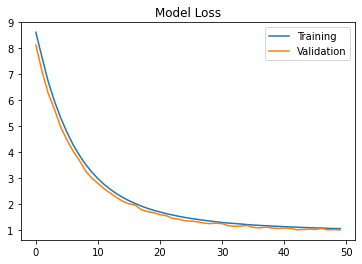

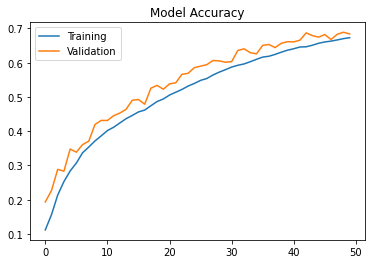

313/313 [==============================] - 1s 2ms/step


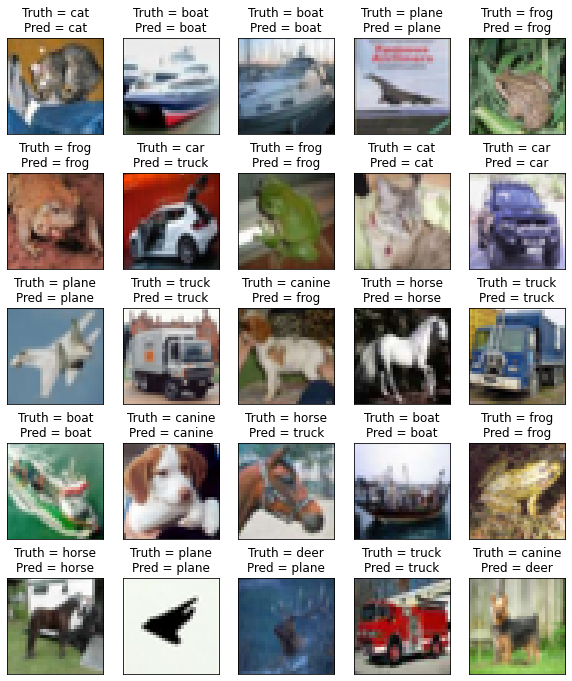

In [18]:
### Repeat your analysis from task 1, creating plots of the losses, metrics AND
### predicted classifications of images in the test set.


plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

y_pred = cifar_model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

f, ax = plt.subplots(5,5, figsize=(10, 12))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_test[i])
    ax[i].set_title(f'Truth = {class_names[y_test[i][0]]}\nPred = {class_names[y_pred_label[i]]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()
